In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter,StrMethodFormatter
from matplotlib.ticker import FormatStrFormatter
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
portfolio = pd.read_json(r'C:\Desktop\portfolio.json', orient='records', lines=True)
profile = pd.read_json(r'C:\Desktop\profile.json', orient='records', lines=True)
transcript = pd.read_json(r'C:\Desktop\transcript.json', orient='records', lines=True)

In [3]:
df=pd.DataFrame(transcript['value'].values.tolist(),index=transcript.index)

In [4]:
transcript=transcript.merge(df,left_index=True, right_index=True)

In [5]:
#one hot encode channels
mlb = MultiLabelBinarizer()
channel = pd.DataFrame(mlb.fit_transform(portfolio['channels']),columns=mlb.classes_, index=portfolio.index)

In [6]:
portfolio=portfolio.merge(channel,left_index=True, right_index=True)

In [7]:
transcript=transcript.merge(portfolio, left_on='offer_id', right_on='id', how='left')

In [8]:
transcript=transcript.merge(profile, left_on='person', right_on='id', how='left')

In [9]:
transcript=transcript.merge(portfolio, left_on='offer id', right_on='id', how='left')

In [10]:
bins= [18,35,51,68,84,102]
labels = ['18-34','35-50','51-67','68-83','84-101']
transcript['age_group']=pd.cut(transcript['age'], bins=bins, labels=labels,right=False)

In [11]:
bins= [30000,50001,75001,100001,120001]
labels = ['30k-50k','50k-75k','75k-100k','100k-120k']
transcript['income_group']=pd.cut(transcript['income'], bins=bins, labels=labels,right=False)

In [12]:
#Calculate Gender Response Rate
transcript_a=transcript[(transcript['event']=='offer completed') & ((transcript['gender']=='M')\
                        | (transcript['gender']=='F'))]\
.groupby(['gender'])['event'].count()

In [13]:
transcript_a

gender
F    15477
M    16466
Name: event, dtype: int64

In [14]:
transcript_b=transcript[(transcript['event']=='offer received') & (transcript['offer_type_y']!='informational')
& ((transcript['gender']=='M') | (transcript['gender']=='F'))]\
.groupby(['gender'])['event'].count()
# I omit O because it's unclear what gender it is so would not inform future targeting strategy

In [15]:
transcript_b

gender
F    21918
M    30562
Name: event, dtype: int64

In [16]:
gender_response_rate=pd.DataFrame(round(transcript_a/transcript_b*100,1)).reset_index()
gender_response_rate

,gender,event
0,F,70.6
1,M,53.9


In [17]:
gender_response_rate.columns=['Gender','Gender Response Rate']
gender_response_rate

,Gender,Gender Response Rate
0,F,70.6
1,M,53.9


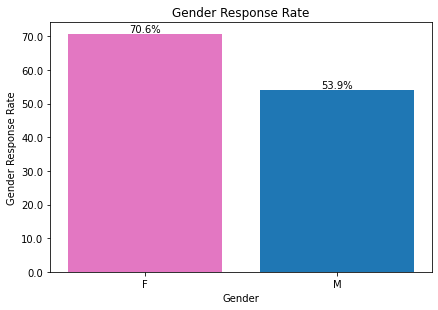

In [18]:
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.bar(gender_response_rate['Gender'],gender_response_rate['Gender Response Rate'],
       color=['tab:pink','tab:blue'])

#https://stackoverflow.com/questions/70235487/matplotlib-adding-value-labels-to-bar-graph
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.1f}%')
plt.tight_layout()
plt.title('Gender Response Rate')
plt.xlabel('Gender')
plt.ylabel('Gender Response Rate')
plt.show()

In [19]:
#Calculate Age Group Response Rate
transcript_c=transcript[(transcript['event']=='offer completed') & ((transcript['age_group']=='18-34')\
                        | (transcript['age_group']=='35-50') | (transcript['age_group']=='51-67') \
                        | (transcript['age_group']=='68-83') | (transcript['age_group']=='84-101'))]\
.groupby(['age_group'])['event'].count()
transcript_c

age_group
18-34      3943
35-50      7302
51-67     13334
68-83      6282
84-101     1583
Name: event, dtype: int64

In [20]:
transcript_d=transcript[(transcript['event']=='offer received') & (transcript['offer_type_y']!='informational')\
                        & ((transcript['age_group']=='18-34')\
                        | (transcript['age_group']=='35-50') | (transcript['age_group']=='51-67') \
                        | (transcript['age_group']=='68-83') | (transcript['age_group']=='84-101'))]\
.groupby(['age_group'])['event'].count()
transcript_d

age_group
18-34      8176
35-50     12281
51-67     20662
68-83      9733
84-101     2349
Name: event, dtype: int64

In [21]:
age_group_response_rate=pd.DataFrame(round(transcript_c/transcript_d*100,1)).reset_index()
age_group_response_rate.columns=['Age Group','Age Group Response Rate']
age_group_response_rate

,Age Group,Age Group Response Rate
0,18-34,48.2
1,35-50,59.5
2,51-67,64.5
3,68-83,64.5
4,84-101,67.4


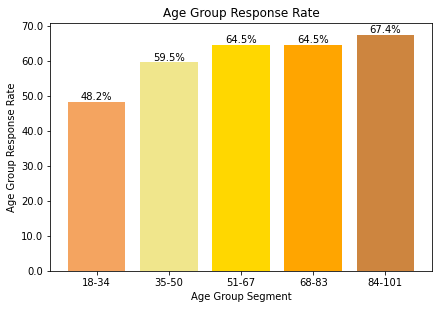

In [22]:
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.bar(age_group_response_rate['Age Group'],age_group_response_rate['Age Group Response Rate'],
       color=['sandybrown','khaki','gold','orange','peru'])

#https://stackoverflow.com/questions/70235487/matplotlib-adding-value-labels-to-bar-graph
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.1f}%')
plt.tight_layout()
plt.title('Age Group Response Rate')
plt.xlabel('Age Group Segment')
plt.ylabel('Age Group Response Rate')
plt.show()

In [23]:
#Calculate Income Group Response Rate
transcript_e=transcript[(transcript['event']=='offer completed') & (transcript['offer_type_y']!='informational') &
                        ((transcript['income_group']=='30k-50k')\
                        | (transcript['income_group']=='50k-75k') | (transcript['income_group']=='75k-100k') \
                        | (transcript['income_group']=='100k-120k'))]\
.groupby(['income_group'])['event'].count()
transcript_e

income_group
30k-50k       6552
50k-75k      14010
75k-100k      9059
100k-120k     2823
Name: event, dtype: int64

In [24]:
transcript_f=transcript[(transcript['event']=='offer received') & (transcript['offer_type_y']!='informational') &
                        ((transcript['income_group']=='30k-50k')\
                        | (transcript['income_group']=='50k-75k') | (transcript['income_group']=='75k-100k') \
                        | (transcript['income_group']=='100k-120k'))]\
.groupby(['income_group'])['event'].count()
transcript_f

income_group
30k-50k      14522
50k-75k      23088
75k-100k     11954
100k-120k     3637
Name: event, dtype: int64

In [25]:
income_group_response_rate=pd.DataFrame(round(transcript_e/transcript_f*100,1)).reset_index()
income_group_response_rate.columns=['Income Group','Income Group Response Rate']
income_group_response_rate

,Income Group,Income Group Response Rate
0,30k-50k,45.1
1,50k-75k,60.7
2,75k-100k,75.8
3,100k-120k,77.6


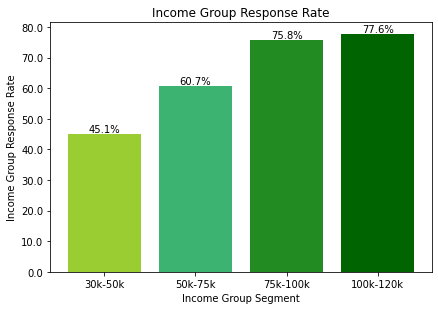

In [26]:
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.bar(income_group_response_rate['Income Group'],income_group_response_rate['Income Group Response Rate'],
       color=['yellowgreen','mediumseagreen','forestgreen','darkgreen'])

#https://stackoverflow.com/questions/70235487/matplotlib-adding-value-labels-to-bar-graph
ax.bar_label(ax.containers[0], label_type='edge', fmt='{:,.1f}%')
plt.tight_layout()
plt.title('Income Group Response Rate')
plt.xlabel('Income Group Segment')
plt.ylabel('Income Group Response Rate')
plt.show()